In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ds-salaries/ds_salaries.csv


In [3]:
df = pd.read_csv('../input/ds-salaries/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
pd.set_option('display.max_columns',100)

In [6]:
df.head(100)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,2021,MI,FT,Cloud Data Engineer,120000,SGD,89294,SG,50,SG,L
96,96,2021,EN,PT,AI Scientist,12000,USD,12000,BR,100,US,S
97,97,2021,MI,FT,Financial Data Analyst,450000,USD,450000,US,100,US,L
98,98,2021,EN,FT,Computer Vision Software Engineer,70000,USD,70000,US,100,US,M


In [7]:
list(df.columns)

['Unnamed: 0',
 'work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [8]:
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,0,1,2,3,4,5,6,7,8,9
work_year,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020
experience_level,MI,SE,SE,MI,SE,EN,SE,MI,MI,SE
employment_type,FT,FT,FT,FT,FT,FT,FT,FT,FT,FT
job_title,Data Scientist,Machine Learning Scientist,Big Data Engineer,Product Data Analyst,Machine Learning Engineer,Data Analyst,Lead Data Scientist,Data Scientist,Business Data Analyst,Lead Data Engineer
salary,70000,260000,85000,20000,150000,72000,190000,11000000,135000,125000
salary_currency,EUR,USD,GBP,USD,USD,USD,USD,HUF,USD,USD
salary_in_usd,79833,260000,109024,20000,150000,72000,190000,35735,135000,125000
employee_residence,DE,JP,GB,HN,US,US,US,HU,US,NZ
remote_ratio,0,0,50,0,50,100,100,50,100,50


In [10]:
df.experience_level.value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [11]:
df.experience_level.value_counts(normalize=True)*100

SE    46.128501
MI    35.090610
EN    14.497529
EX     4.283361
Name: experience_level, dtype: float64

In [12]:
pd.crosstab(df['company_location'],df['company_size'])

company_size,L,M,S
company_location,,,
AE,1,0,2
AS,0,0,1
AT,2,1,1
AU,1,1,1
BE,0,2,0
BR,0,2,1
CA,11,16,3
CH,2,0,0
CL,1,0,0


In [15]:
df[['company_location','company_size']].sort_values('company_size')[0:10]

,company_location,company_size
0,DE,L
202,ES,L
204,US,L
206,US,L
208,US,L
209,US,L
210,SI,L
213,CH,L
215,US,L
217,DE,L


In [16]:
df[['company_location','company_size']].sort_values('company_size',ascending=False)[0:10]

,company_location,company_size
251,US,S
199,US,S
203,US,S
71,FR,S
70,LU,S
69,AT,S
68,US,S
522,GR,S
66,DE,S
65,DE,S


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

NameError: name 'x' is not defined

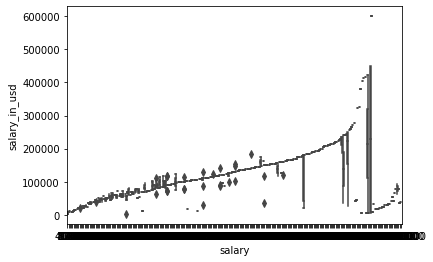

In [28]:
sns.boxplot(x='salary',y='salary_in_usd',data=df)
x.label()
y.label()
plt.show()
